In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt





In [2]:
def load_image(path):
    return np.array(Image.open(path).convert("RGB"), dtype=np.float32)

def show(img, title=""):
    plt.figure(figsize=(6,6))
    plt.imshow(img.astype(np.uint8))
    plt.title(title)
    plt.axis('off')

def save(path, img):
    Image.fromarray(np.clip(img, 0, 255).astype(np.uint8)).save(path)


In [ ]:
def convolve(image, kernel):
    h, w, c = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded = np.pad(image, ((pad_h, pad_h),(pad_w, pad_w),(0,0)), mode='edge')
    result = np.zeros_like(image)

    for y in range(h):
        for x in range(w):
            region = padded[y:y+kh, x:x+kw]
            result[y, x] = np.sum(region * kernel[:, :, None], axis=(0,1))
    return result

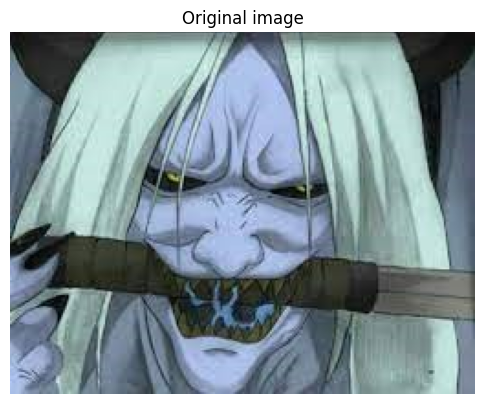

In [4]:
img = load_image("123.jpg")   # ← заміни на своє
show(img, "Original image")


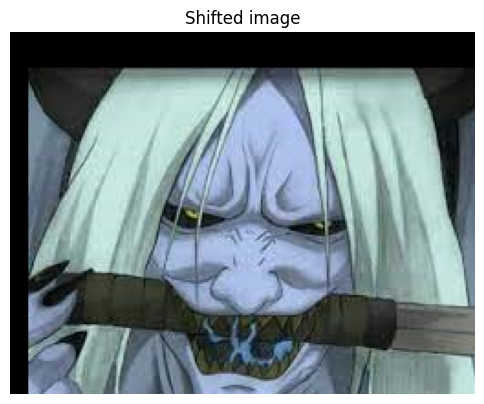

In [5]:
def shift(image, dx=10, dy=20):
    h, w, c = image.shape
    out = np.zeros_like(image)
    out[dy:h, dx:w] = image[0:h-dy, 0:w-dx]
    return out

shifted = shift(img)
show(shifted, "Shifted image")

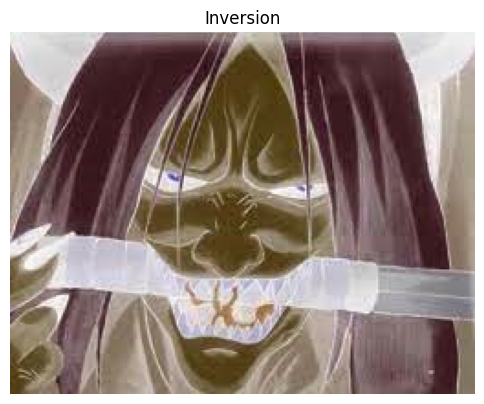

In [6]:
def invert(image):
    return 255 - image
inv = invert(img)
show(inv, "Inversion")

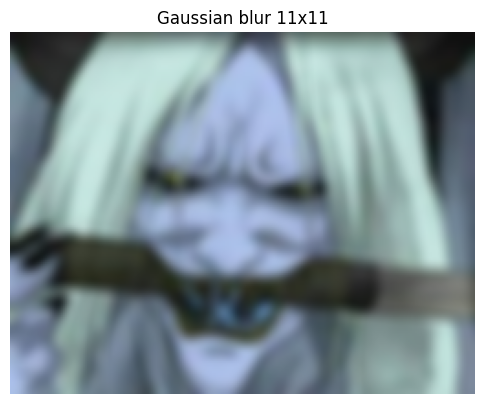

In [7]:
def gaussian_kernel(size=11, sigma=3):
    ax = np.linspace(-(size-1)/2, (size-1)/2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2*sigma*sigma))
    return kernel / kernel.sum()

def gaussian_blur(image, size=11, sigma=3):
    return convolve(image, gaussian_kernel(size, sigma))

gauss = gaussian_blur(img)
show(gauss, "Gaussian blur 11x11")

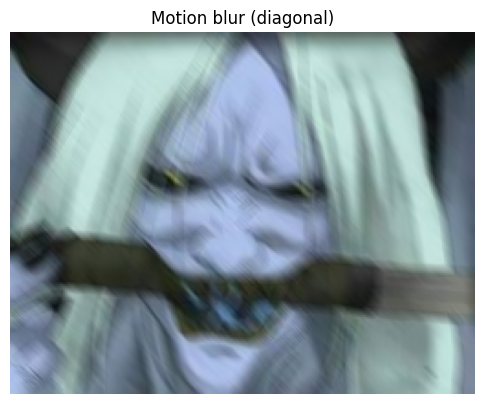

In [8]:
def motion_blur_diagonal(size=7):
    kernel = np.zeros((size,size),dtype=np.float32)
    np.fill_diagonal(kernel, 1)
    return kernel / size

def motion_blur(image, size=7):
    return convolve(image, motion_blur_diagonal(size))

motion = motion_blur(img)
show(motion, "Motion blur (diagonal)")

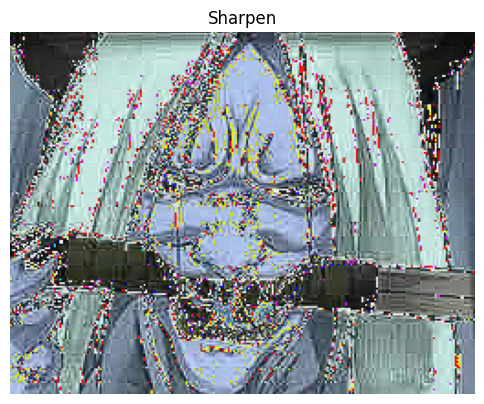

In [9]:
def sharpen(image):
    kernel = np.array([
        [0, -1,  0],
        [-1, 5, -1],
        [0, -1,  0]
    ], dtype=np.float32)
    return convolve(image, kernel)

sharp = sharpen(img)
show(sharp, "Sharpen")

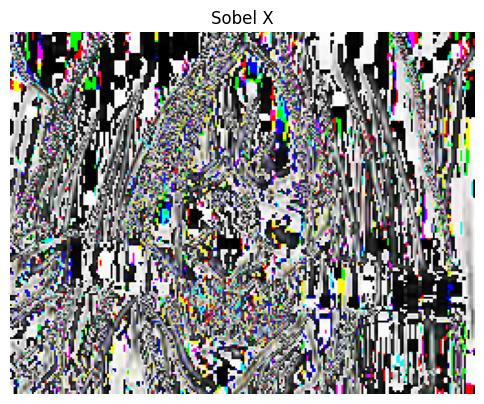

In [10]:
def sobel_x(image):
    kernel = np.array([
        [-1,0,1],
        [-2,0,2],
        [-1,0,1]
    ], dtype=np.float32)
    return convolve(image, kernel)

sobx = sobel_x(img)
show(sobx, "Sobel X")

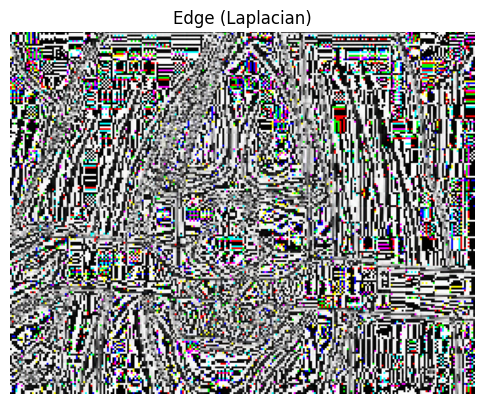

In [11]:
def edge(image):
    kernel = np.array([
        [0, 1, 0],
        [1,-4, 1],
        [0, 1, 0]
    ], dtype=np.float32)
    return convolve(image, kernel)

edges = edge(img)
show(edges, "Edge (Laplacian)")

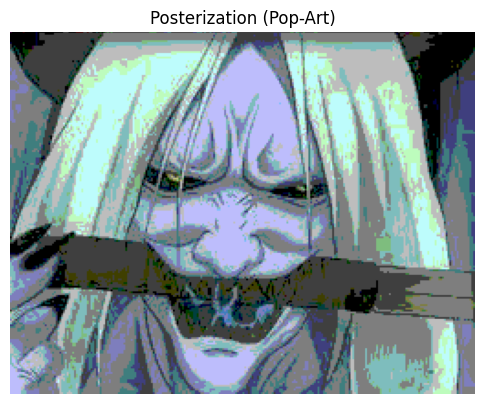

In [12]:
def posterize(image, levels=5):
    step = 255 // (levels - 1)
    return np.round(image / step) * step

post = posterize(img)
show(post, "Posterization (Pop-Art)")

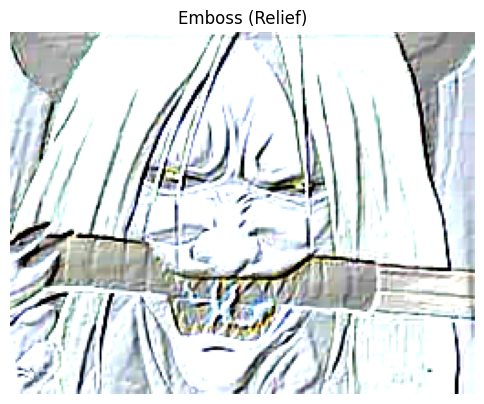

In [19]:
def emboss(image):
    kernel = np.array([
        [-2, -1, 0],
        [-1,  1, 1],
        [ 0,  1, 2]
    ], dtype=np.float32)
    out = convolve(image, kernel)
    return np.clip(out + 128, 0, 255)
emb = emboss(img)
show(emb, "Emboss (Relief)")

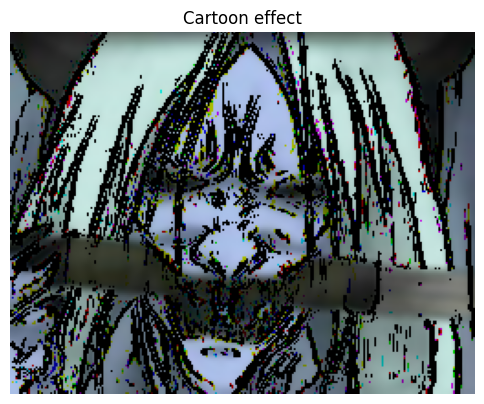

In [20]:
def cartoon(image):
    blurred = gaussian_blur(image, size=7, sigma=2)
    edges = sobel_x(image)
    edges = np.clip(np.abs(edges), 0, 255)
    edges = edges > 50  # бінаризація
    return np.where(edges, 0, blurred)
cart = cartoon(img)
show(cart, "Cartoon effect")

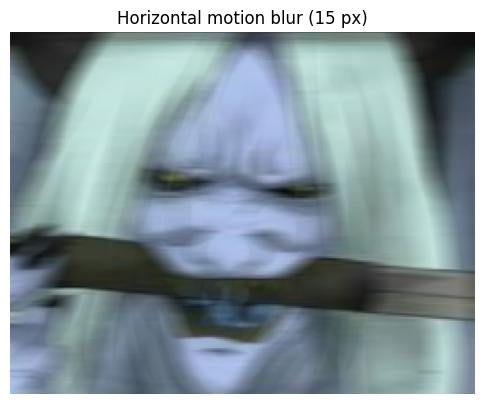

In [21]:
def motion_blur_horizontal(size=15):
    kernel = np.zeros((size, size), dtype=np.float32)
    kernel[size//2, :] = 1
    return kernel / size

def motion_blur_h(image, size=15):
    return convolve(image, motion_blur_horizontal(size))
motion_h = motion_blur_h(img, size=15)
show(motion_h, "Horizontal motion blur (15 px)")

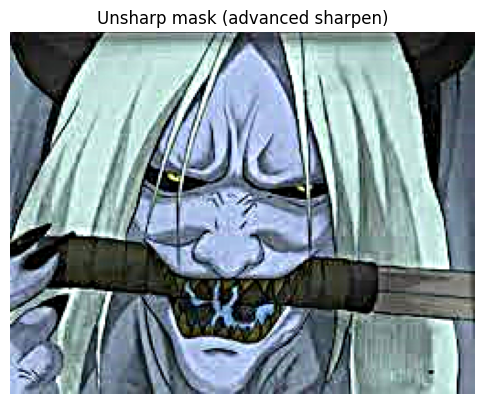

In [22]:
def unsharp_mask(image, sigma=3):
    blurred = gaussian_blur(image, size=11, sigma=sigma)
    mask = image - blurred
    out = image + 1.5 * mask
    return np.clip(out, 0, 255)
unsharp = unsharp_mask(img, sigma=3)
show(unsharp, "Unsharp mask (advanced sharpen)")